# Online Shopper Purchase Prediction


_By: Zul Fauzi Abas_

---

## 0. Executive Summary

### Problem Statement

The challenge faced by e-commerce in enhancing conversions through personalized marketing within a competitive online marketplace is well recognized.

To tackle this issue, the construction of a predictive model is aimed to determine the likelihood of an online shopper making a purchase based on their detailed browsing behavior.

The goal is set to achieve model accuracy that surpasses a predefined baseline by at least 10%, which is derived from the dataset's existing distribution ratio of purchase to no-purchase.

The anticipated outcome is a Jupyter Notebook that encompasses the model, insights, and, ideally, the machine learning code suitable for personalizing e-commerce campaigns and facilitating upselling.

### Method, Models and Metrics

Initially, an Exploratory Data Analysis (EDA) will be conducted to identify missing values, understand the distribution, identify patterns, and detect outliers. Following this, the data will be preprocessed by addressing any issues to prepare it for modeling. In the modeling phase, all models will be evaluated and fine-tuned to achieve the best prediction.

In terms of model selection, various categorical machine learning models including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest will be tested. They will be evaluated, and one will be chosen for further hyperparameter tuning to enhance performance.

Regarding evaluation metrics, Accuracy will be employed to assess the performance of the model, with the objective of achieving at least a 10% improvement over the baseline accuracy, which is derived from the distribution ratio of purchase to no-purchase.

### Data Source and Context

The project use a dataset from Kaggle, featuring 12,330 sessions, each corresponding to a unique user over a 1-year period to ensure diversity and minimize bias related to specific user behaviors, campaigns, or time frames. 

It consist of 10 numerical and 8 categorical variables, detailing browsing behavior like page visits and durations across different page categories (administrative, informational, product-related), as well as user characteristics (operating system, browser, region) and session details (traffic type, visitor type, weekend, month).

The focus will exclusively be on variables detailing browsing behavior, narrowing the analysis to key factors that influence the target variable and aligning closely with the project's objective to effectively understand and predict online purchasing behavior.

### Risks & Assumptions

The main risk involves is the potential for overfitting, which could result in a model that performs well on training data but poorly on new data. The class imbalance also might lead to biased predictions towards the majority class (No purchase).

The assumption is made that the dataset accurately reflects the broader population of online shoppers and that browsing behavior reliably indicates purchase intention.

---

## 1. Import Libraries

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score

# Hyperparameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

---

## 2. Import & Read Data

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

# Filter only the detail browsing behavior part of the data
df = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
           'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'Revenue']]

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,False


---

## 3. Data Description

Below are list of column and their definition:
- `Administrative`: Number of visits in that session.
- `Administrative_Duration`: Total time spent on the pages.
- `Informational`: Number of visits in that session.
- `Informational_Duration`: Total time spent on the pages.
- `ProductRelated`:	Number of visits in that session.
- `ProductRelated_Duration`: Total time spent on the pages.
- `BounceRates`: Percentage of visitors who exit from site after viewing only one page.
- `ExitRates`: The percentage of times a page was the last in a session, for all page views to the page.
- `PageValues`: The average value of a page that a user visited before completing an e-commerce transaction.
- `Revenue`: Target class indicating whether the session resulted in a purchase.

---

## 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights

## 4.1. Data types, missing values and summary statistics

In [3]:
# Non-null count and data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   Revenue                  12330 non-null  bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 879.1 KB


In [4]:
# Missing value set by columns
df.isnull().sum().sort_values(ascending = False)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
Revenue                    0
dtype: int64

In [5]:
# Summary statistics for dataset 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


## 4.2. Univariate Analysis


### `Administrative`

Number of visits to Administrative pages per session.

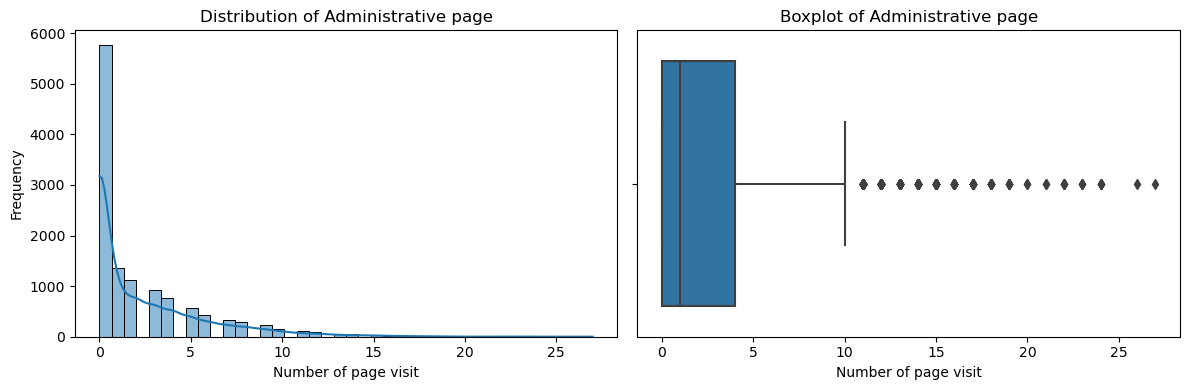

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['Administrative'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Administrative page') 
ax[0].set_xlabel('Number of page visit')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['Administrative'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Administrative page') 
ax[1].set_xlabel('Number of page visit')

plt.tight_layout()
plt.show()

### `Administrative_Duration`

Total time spent on the Administrative pages

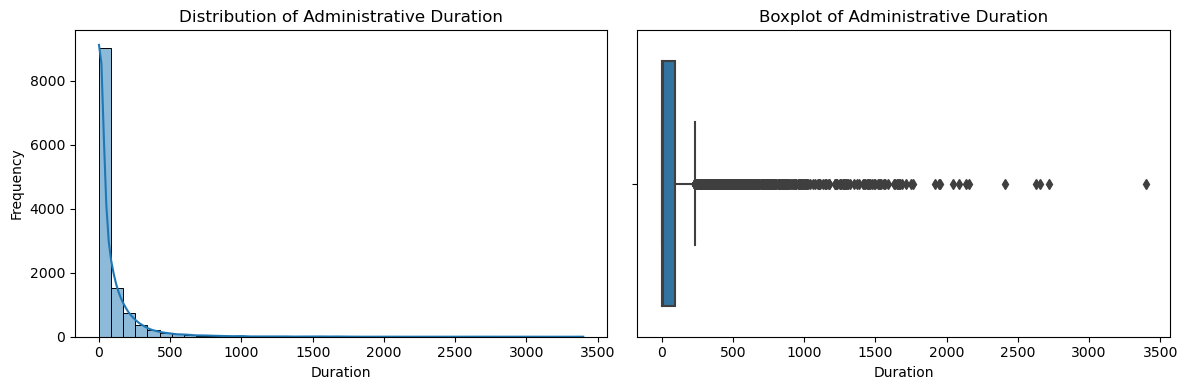

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['Administrative_Duration'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Administrative Duration') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['Administrative_Duration'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Administrative Duration') 
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

### `Informational`

Number of visits to Informational pages per session.

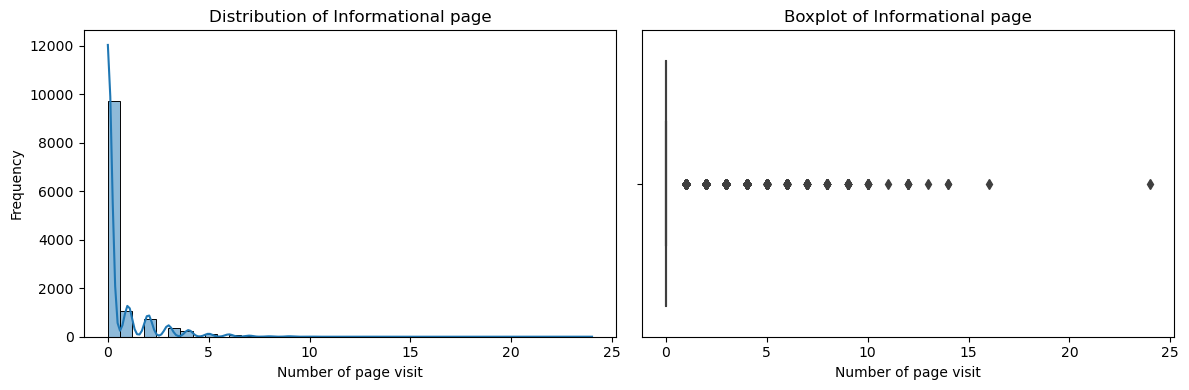

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['Informational'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Informational page') 
ax[0].set_xlabel('Number of page visit')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['Informational'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Informational page') 
ax[1].set_xlabel('Number of page visit')

plt.tight_layout()
plt.show()

### `Informational_Duration`

Total time spent on the Informational_Duration pages - could directly correlate with a user's interest level and intent to purchase.

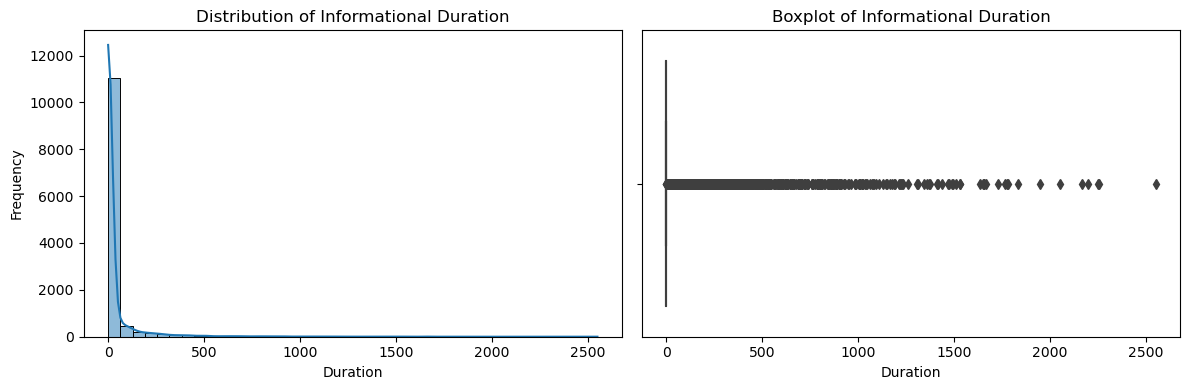

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['Informational_Duration'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Informational Duration') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['Informational_Duration'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Informational Duration')  
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

### `ProductRelated`

Number of visits to Product Related pages per session.

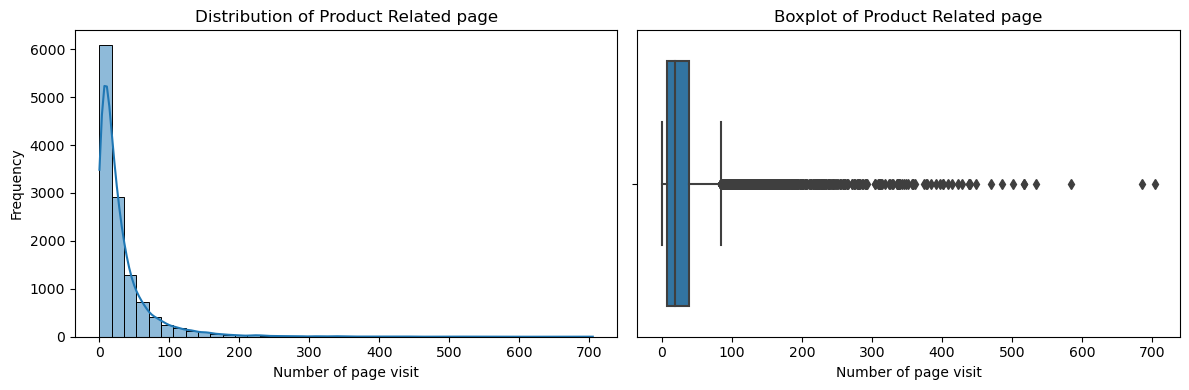

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['ProductRelated'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Product Related page') 
ax[0].set_xlabel('Number of page visit')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['ProductRelated'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Product Related page') 
ax[1].set_xlabel('Number of page visit')

plt.tight_layout()
plt.show()

### `ProductRelated_Duration`

Total time spent on the ProductRelated_Duration pages - how engaged users are with the actual products on the site, which is a critical for their potential to convert into purchasers.

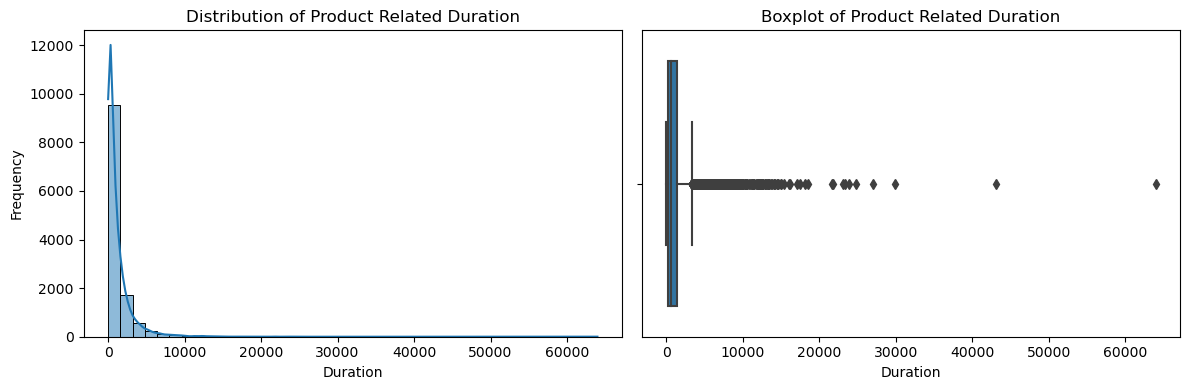

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['ProductRelated_Duration'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Product Related Duration') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['ProductRelated_Duration'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Product Related Duration')
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

### `BounceRates`

Percentage of visitors who exit from site after viewing only one page. High bounce rates might indicate that users did not find what they were looking for or were not engaged by the content on the entry page.

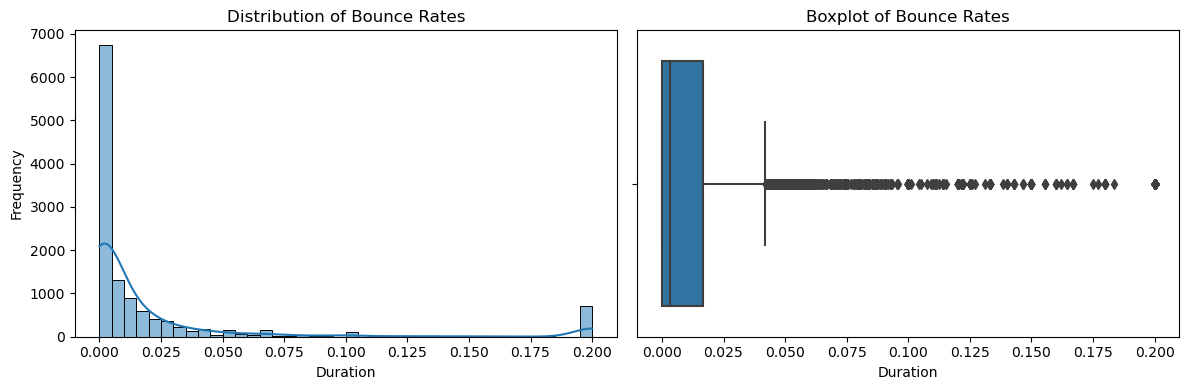

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['BounceRates'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Bounce Rates') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['BounceRates'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Bounce Rates')
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

### `ExitRates`

The percentage of times a page was the last in a session, for all page views to the page. Offers insight into how effective the site's content is at keeping visitors engaged and navigating through to other pages or completing a purchase.

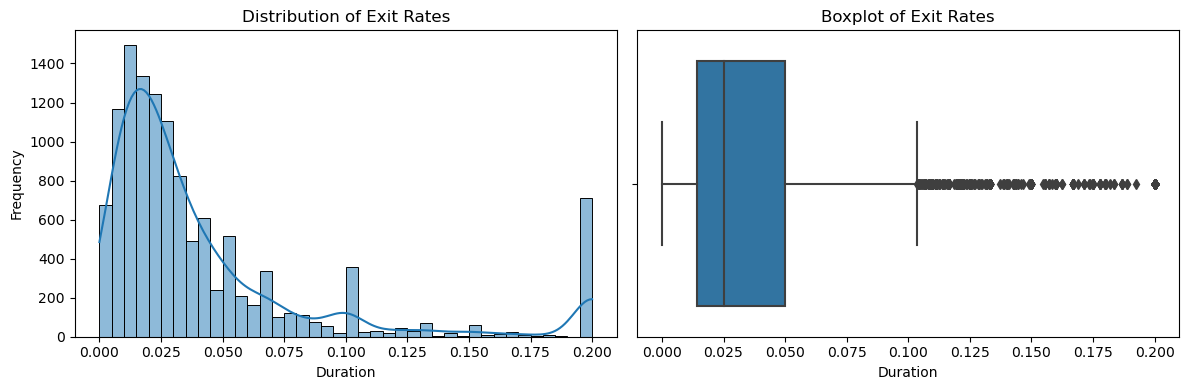

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['ExitRates'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Exit Rates') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['ExitRates'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Exit Rates')
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

###  `PageValues`

The average value of a page that a user visited before completing an e-commerce transaction. High values indicate pages that are highly effective at driving conversions.

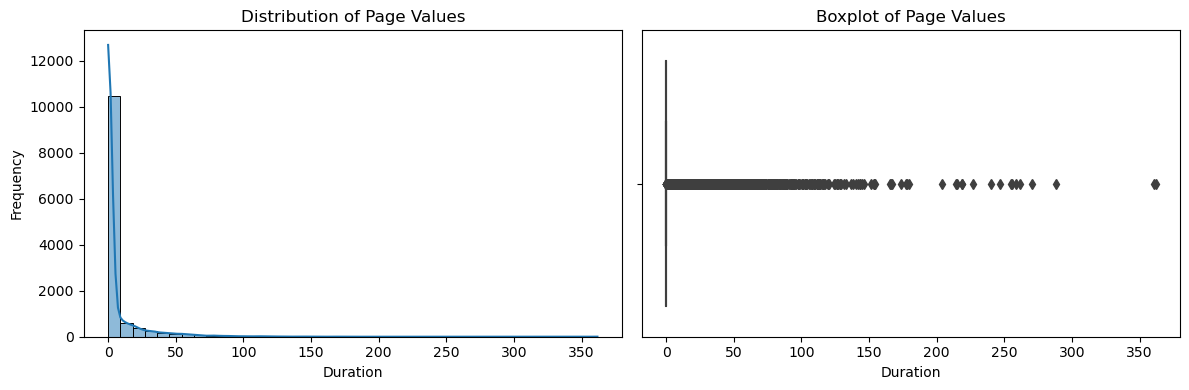

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot
sns.histplot(df['PageValues'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Distribution of Page Values') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# box plot
sns.boxplot(x=df['PageValues'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Page Values')
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

### `Revenue`

Target class indicating whether the session resulted in a purchase or not.

Text(0, 0.5, 'Count')

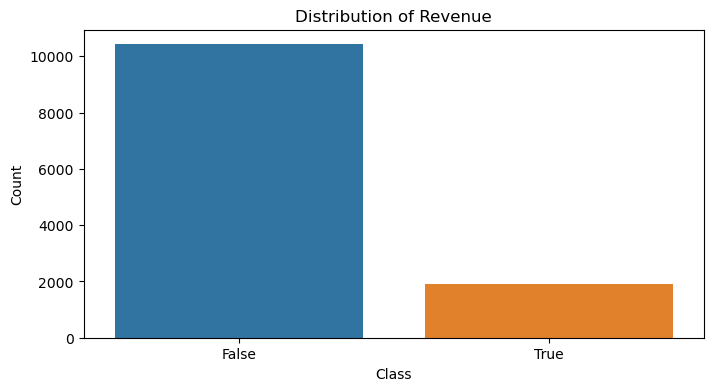

In [15]:
# Plot Revenue
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Revenue')

# labels & title
plt.title('Distribution of Revenue')
plt.xlabel('Class')
plt.ylabel('Count')

### Univariate Analysis Insights

- **Skewness:** Features, excluding 'Revenue', exhibit right-skewed distributions. This skewness can hinder models that assume a normal distribution, potentially leading to inaccurate predictions if not corrected.
- **Outliers:** Present in all features besides 'Revenue', outliers can distort the true representation of data, affecting model performance by leading to overfitting or skewed predictions.
- **Class Imbalance:** The 'Revenue' distribution indicates a significant imbalance, which could make the model biased toward the majority class, reducing its ability to accurately predict less frequent outcomes.
- These issues will be tackle in the 'Data Preprocessing' stage ensuring the data is primed for accurate modeling.

## 4.3. Multivariate Analysis

To understand the relationships between features and target variable (purchase), as well as the interactions among the features, I will be doing **Correlation Analysis**.

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# look at how each feature correlates with 'Revenue' 
correlation_matrix['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

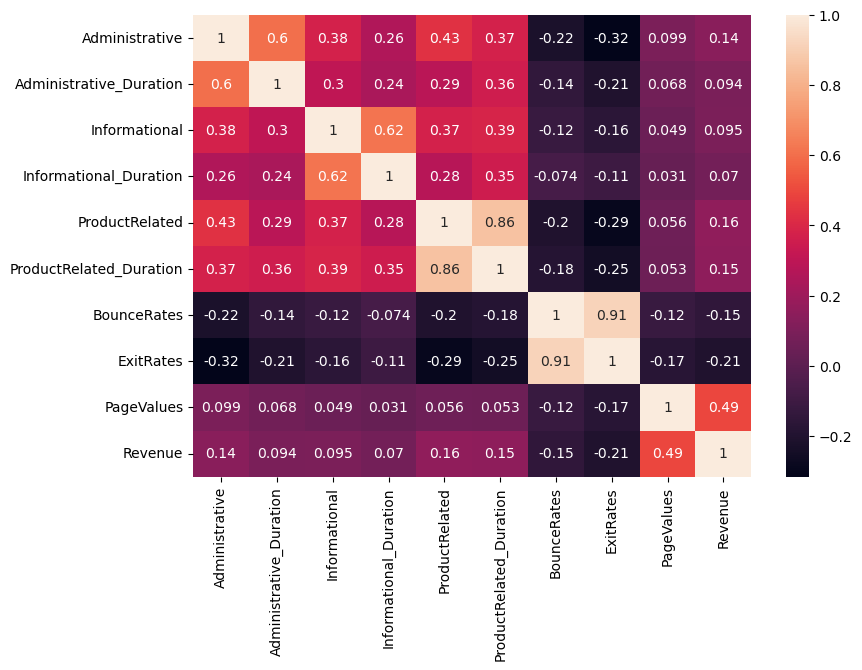

In [17]:
# visualize it with a heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Multivarate Analysis Insight

- **Positive Correlations:** Features such as 'PageValues' demonstrate strong positive correlations with 'Revenue', underscoring their predictive value for purchases.
- **Negative Correlations:** 'BounceRates' and 'ExitRates' show negative correlations with 'Revenue', suggesting these factors may decrease the likelihood of purchases.
- These insights will inform our feature selection, focusing on those with positive correlations to 'Revenue' for predictive modeling. This approach aims to enhance model accuracy by concentrating on variables most indicative of purchasing behavior.

---

## 5. Data Preprocessing


Based on earlier analysis, only features with positive correlations to 'Revenue' will be selected for modeling. These include 'PageValues', 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'Informational', and 'Informational_Duration'.

Features such as 'BounceRates' and 'ExitRates' is excluded due to their strong negative correlation with 'Revenue'. This decision is aimed at simplifying the model to enhance its clarity and interpretability to predicting purchase behavior effectively.

In [18]:
features = ['PageValues', 'ProductRelated', 'ProductRelated_Duration', 
            'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration']

## 5.1. Detect and Remove Outliers

The Interquartile Range (IQR) method is utilized for the detection and removal of outliers from specified features, ensuring the robustness of the dataset for analysis.

In [19]:
def detect_and_remove_outliers(df, features, n=2):
    
    # Detect outliers
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [index for index, count in outlier_indices.items() if count > n]
    
    # Remove outliers
    df_cleaned = df.drop(multiple_outliers, axis=0).reset_index(drop=True)
    
    return df_cleaned

# Apply function
df_cleaned = detect_and_remove_outliers(df, features)

Using `Administrative` feature to visualize before and after removing outliers.

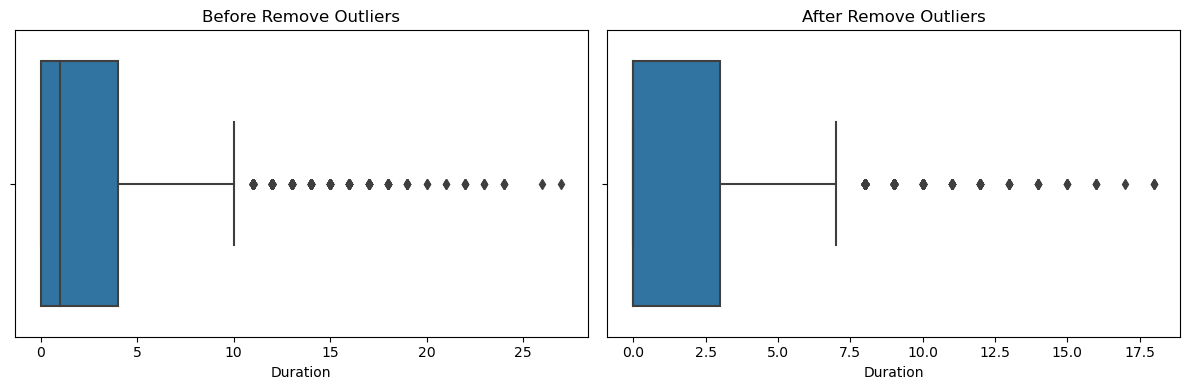

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot BEFORE
sns.boxplot(x=df['Administrative'], orient='h', ax=ax[0])
ax[0].set_title('Before Remove Outliers') 
ax[0].set_xlabel('Duration')

# distribution plot AFTER
sns.boxplot(x=df_cleaned['Administrative'], orient='h', ax=ax[1])
ax[1].set_title('After Remove Outliers') 
ax[1].set_xlabel('Duration')

plt.tight_layout()
plt.show()

## 5.2. Handle Skewness with Log Transformation


To mitigate skewness, log transformation is applied to features, in hoping to normalizing the distribution making it more amenable to various modeling techniques. 

In [21]:
def apply_log(df, features):
    
    for feature in features:
        
        # Apply log transformation, ensure non-negative values
        df[feature] = df[feature].apply(lambda x: np.log(x + 1) if x > 0 else 0)
    
    return df

# Apply function
df_transformed = apply_log(df_cleaned, features)

Using `ProductRelated` feature to visualize before and after applying log transformation

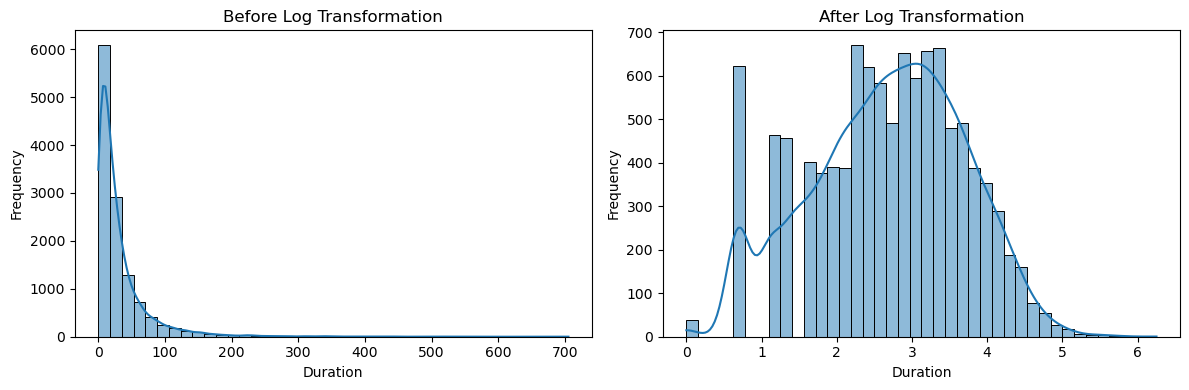

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# distribution plot BEFORE
sns.histplot(df['ProductRelated'], kde=True, bins=40, ax=ax[0])
ax[0].set_title('Before Log Transformation') 
ax[0].set_xlabel('Duration')  
ax[0].set_ylabel('Frequency')  

# distribution plot AFTER
sns.histplot(df_transformed['ProductRelated'], kde=True, bins=40, ax=ax[1])
ax[1].set_title('After Log Transformation') 
ax[1].set_xlabel('Duration')  
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5.3. Balance the Dataset with SMOTE

Lastly, the dataset is balanced using SMOTE (but only for the training set) to ensure that the synthetic data generated accurately represent the preprocessed feature space, addressing the issue of class imbalance.

In [23]:
# Prepare X & Y
X = df_transformed[features]
y = df_transformed['Revenue']

# Split into training & testing sets
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# Instantiate SMOTE
smote = SMOTE(random_state=42)
    
# Fit SMOTE
X_train, y_train = smote.fit_resample(X_train_1, y_train_1)

Visualize `Revenue` feature after apply SMOTE.

Text(0, 0.5, 'Count')

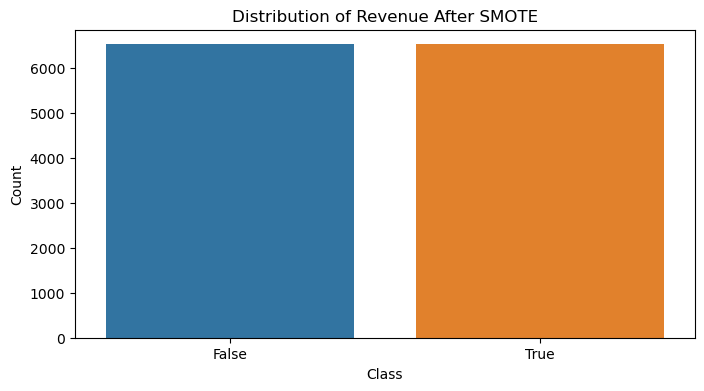

In [24]:
# Plot Revenue after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)

# labels & title
plt.title('Distribution of Revenue After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

The visual above shown that the dataset is balance and ready for modeling.

---

# 6. Modelling 

### Establishing Predefined Baseline Accuracy

This baseline score, derived from predicting class in 'Revenue', will be compared with our post-tuning best score to assess if our modeling goal is achieved. 

In [25]:
majority_class = y_train.mode()[0]
base_preds = np.full(shape=y_train.shape, fill_value=majority_class)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_train, base_preds)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.5000


## 6.1. Scale Data

Standard scaling is applied to normalize the data, ensuring that all features contribute equally to the model's performance.

In [26]:
# Apply standard scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6.2. Fit Model to Data and make Predictions

This requires 3 steps: instantiate the model, fit the model to the training set and predict the data in test set.

### `Logistic Regression`

In [27]:
# Instantiate model
lr = LogisticRegression(max_iter=1000)

# Fit model to training set
lr.fit(X_train, y_train)

# Predict test set
lr_pred = lr.predict(X_test)

### `K-Nearest Neighbours (KNN)`

In [28]:
# Instantiate model
knn = KNeighborsClassifier()

# Fit model to training set
knn.fit(X_train, y_train)

# Predict test set
knn_pred = knn.predict(X_test)       

### `Decision Tree`

In [29]:
# Instantiate model
dt = DecisionTreeClassifier()

# Fit model to training set
dt.fit(X_train, y_train)

# Predict test set
dt_pred = dt.predict(X_test)        

### `Random Forest`

In [30]:
# Instantiate model
rf = RandomForestClassifier()

# Fit model to training set
rf.fit(X_train, y_train)

# Predict test set
rf_pred = rf.predict(X_test)    

## 6.3. Model Evaluation

For evaluation metrics, Accuracy is use as the primary measure to assess model performance, aiming for at least a 10% improvement over the baseline accuracy derived from the purchase/no-purchase distribution ratio.

In [31]:
# Logistic Regression model accuracy:
print(" Logistic Regression ".center(32, "="))
print(f'Train accuracy:{lr.score(X_train, y_train)}')             # from model
print(f'Test accuracy:{accuracy_score(y_test, lr_pred)}')         # from sklearn metrics
print( )

# KNN model accuracy:
print(" KNN ".center(32, "="))
print(f'Train accuracy:{knn.score(X_train, y_train)}')      
print(f'Test accuracy:{accuracy_score(y_test, knn_pred)}') 
print( )

# Decision tree model accuracy:
print(" Decision Tree ".center(32, "="))
print(f'Train accuracy:{dt.score(X_train, y_train)}')      
print(f'Test accuracy:{accuracy_score(y_test, dt_pred)}')
print( )

# Random forest model accuracy:
print(" Random Forest ".center(32, "="))
print(f'Train accuracy:{rf.score(X_train, y_train)}')      
print(f'Test accuracy:{accuracy_score(y_test, rf_pred)}') 
print( )

===== Logistic Regression ======
Train accuracy:0.8431462741490341
Test accuracy:0.92187009727016

============= KNN ==============
Train accuracy:0.9306194418889912
Test accuracy:0.8459366175086288

======== Decision Tree =========
Train accuracy:0.9996933455995094
Test accuracy:0.8713523689990587

======== Random Forest =========
Train accuracy:0.9996933455995094
Test accuracy:0.9002196422968308



Putting the training and testing `accuracy` in a table so we can directly compare them all:




|           Model          | Training | Testing |
|:------------------------:|:----------:|:---------:|
|     Logistic Regression  |    0.843   |    0.921  |
|    k-Nearest Neighbors   |    0.930   |    0.845  |
|       Decision Tree      |    0.999   |    0.872  |
|       Random Forest      |    0.999   |    0.904  |





Based on the accuracy results above, the Logistic Regression model demonstrates the optimal balance between the training and testing sets. It is the only model that does not exhibit overfitting, as evidenced by its testing accuracy surpassing its training accuracy, thereby indicating its strong generalization capabilities to unseen data.

## 6.4. Hyperparameter Tuning

Here, pipeline was used to chain the StandardScaler with the Logistic Regression model, which will then be fine-tuned using GridSearchCV.

In [32]:
# Instantiate Pipeline
pipe = Pipeline([('ss', StandardScaler()),
                ('lr', LogisticRegression())])

# Define dictionary of hyperparameter
pipe_param = {'ss__with_mean': [True, False], 
              'ss__with_std': [True, False], 
              'lr__C': [0.01, 0.1, 1, 10, 100], 
              'lr__penalty': ['l1', 'l2'], 
              'lr__solver': ['liblinear', 'saga']}  # These solvers work well with l1/l2 penalties}

# Instantiate GridSearchCV
pipe_gridsearch = GridSearchCV(pipe, pipe_param, cv=5, scoring='accuracy')

# Fit GridSearchCV
pipe_gridsearch.fit(X_train, y_train)

# Evaluate best model
print("Best parameters:", pipe_gridsearch.best_params_)  
print("Best score:", pipe_gridsearch.best_score_)

Best parameters: {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'ss__with_mean': True, 'ss__with_std': True}
Best score: 0.8436062520722276


In [33]:
# Evaluate best model on test data.
pipe_gridsearch.score(X_test, y_test)

0.9215563225604017

### Final Assessment:

In [34]:
# Calculating the percentage improvement over the baseline
baseline_accuracy = 0.5  
best_score = 0.9215  

percentage_improvement = ((best_score - baseline_accuracy) / baseline_accuracy) * 100

percentage_improvement

84.3


After hyperparameter tuning, the model's **best score of _92.15%_** represents an **_84.3%_ improvement** over the **_50%_ baseline**, vastly exceeding our 10% improvement goal. This substantial increase highlights the effectiveness of our tuning strategy and underscores the model's predictive accuracy.

---

## 7. Conclusion

In addressing the challenge of boosting e-commerce conversions, our project developed a predictive model focused on users' browsing behavior, significantly exceeding our initial accuracy goal with a logistic regression model achieving **_92.15%_ accuracy**. This performance, an **_84.3%_ improvement over the baseline**, highlights the model’s effectiveness in leveraging browsing data for personalized marketing.

The project demonstrates the potential of data-driven approaches to enhance online shopping experiences, offering a solid foundation for future strategies in e-commerce marketing. Our findings underscore the value of predictive modeling in identifying key factors that influence purchasing decisions, paving the way for more targeted and effective marketing campaigns.